In [2]:
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
from utils import *

In [4]:
import igraph as ig

g = ig.Graph(edges=[(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)], directed=False)
info(g)

Is Directed:              False
Average Degree:           2.0
Max Degree:               2
Clustering Coefficient:   0.0
Number of Vertices:       5
Number of Edges:          5


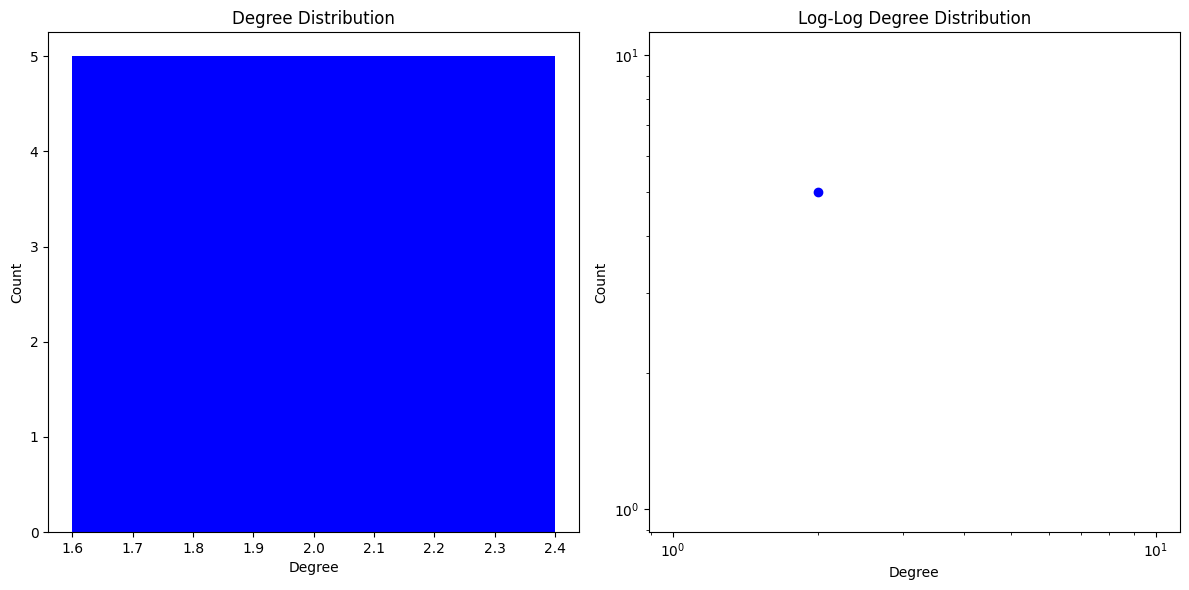

In [6]:
plot_degree_distribution(g)